# Email Spam Classifier Using Naive Bayes

Naive Bayes is a supervised classification technique based on Baye's Theorem with as assumption of independence amoung predictiors. That is , a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


It's a popular technique for text categorization, judging documetns as belonging to one category or the other (such as spam or legitimate, sports or politics, etc.) with word frequencies as features.

Goal :  Previously unseen records should be assigned a class as accurately as possible.


We have a buch of emails classifies as 'spam' and a bunch of emails classified as 'ham' (not spam) The emails are first read and stored in a dataframe. They are then parsed using CountVectorizer This information is used to train the model and its prediction is then tested with a sample input Python Libraries used: pandas, numpy, io, os, CountVectorizer and MultinomialNB from sklearn

The Spam classifier classifies the given input as a spam/ham. A sample output is found here.

Some Practical Applications:

. Direct Marketing

. Fraud Detection

. Text Classification

. Spam Filtering

. Categorizing News

. Medical Diagnosis

. Face Recognition

# Context


The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [2]:
import pandas as pd

In [8]:
!pip install chardet

                                              0.0/199.4 kB ? eta -:--:--
     ------------------------------------- 199.4/199.4 kB 12.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [4]:
df = pd.read_csv('spam.csv',encoding= 'Windows-1252')

In [5]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [6]:
df.rename(columns={'v1' : 'Target', 'v2':'Text'}, inplace = True)
df.sample(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
4186,ham,Dear got bus directly to calicut,NaN,NaN,NaN
667,ham,This pay is &lt;DECIMAL&gt; lakhs:),NaN,NaN,NaN
1419,ham,\Speak only when you feel your words are bette...,NaN,NaN,NaN
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...,NaN,NaN,NaN
5408,ham,... Are you in the pub?,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## We have to perform

1. Data Cleaning
2. EDA 
3. Text Preprocessing
4. Model Building
5. Evauaction
6. Improvement
7. Website
8. Deploy

## 1. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Target      5572 non-null   object
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# dropping las 3 columns

df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [10]:
df.sample(5)

,Target,Text
2804,ham,I think it's all still in my car
3419,spam,"As a valued customer, I am pleased to advise y..."
2384,ham,"Sorry, I'll call later"
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha
4273,ham,Ball is moving a lot.will spin in last :)so ve...


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
df['Target'] = le.fit_transform(df['Target'])

In [13]:
df.sample(10)

,Target,Text
4392,1,RECPT 1/3. You have ordered a Ringtone. Your o...
4619,0,THIS IS A LONG FUCKIN SHOWR
5488,0,K. I will sent it again
2522,0,Dunno lei... I might b eatin wif my frens... I...
52,0,K fyi x has a ride early tomorrow morning but ...
3498,0,I hope you arnt pissed off but id would really...
5100,0,"Aight, call me once you're close"
1589,0,I love you. You set my soul on fire. It is not...
3669,0,Ok thanx... Take care then...
2838,0,"Easy mate, * guess the quick drink was bit amb..."


In [14]:
# cheking missing values

df.isna().sum()

Target    0
Text      0
dtype: int64

In [15]:
# checking for duplicates

df.duplicated().sum()

403

In [16]:
# removing the duplicated

df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df.sample(5)

,Target,Text
4016,0,Eek that's a lot of time especially since Amer...
4644,0,Are you planning to come chennai?
4666,0,I send the print outs da.
3376,0,Yup. Wun believe wat? U really neva c e msg i ...
2889,0,Shuhui has bought ron's present it's a swatch ...


In [20]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [21]:
# 0 is ham and 1 is spam

In [22]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x28c82e61350>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

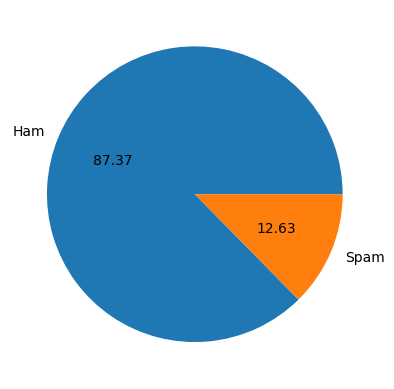

In [23]:
plt.pie(df['Target'].value_counts(),labels= ['Ham','Spam'],autopct='%0.2f')

In [24]:
# we can see, Data is imbalanced

In [25]:
import nltk

In [26]:
# nltk.download("punkt")

In [27]:
df['Num_char'] = df['Text'].apply(len) #num of char in each row
df.sample(5)

,Target,Text,Num_char
237,0,Where are you?when wil you reach here?,38
3595,0,Good morning princess! Happy New Year!,38
4897,0,Oh for fuck's sake she's in like tallahassee,44
2691,0,Hey tmr meet at bugis 930 ?,27
5271,0,So u wan 2 come for our dinner tonight a not?,45


In [28]:
# nltk.download("punkt")

In [29]:
df['Num_Words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.sample(5)

,Target,Text,Num_char,Num_Words
3663,0,Huh? 6 also cannot? Then only how many mistakes?,48,13
97,0,i see. When we finish we have loads of loans t...,51,13
2544,0,She is our sister.. She belongs 2 our family.....,289,71
186,0,"Haha awesome, be there in a minute",34,8
3932,0,"Playin space poker, u?",22,6


In [30]:
df['Num_Sent'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.sample(5)

,Target,Text,Num_char,Num_Words,Num_Sent
716,1,+449071512431 URGENT! This is the 2nd attempt ...,163,31,5
4505,0,When are you guys leaving?,26,6,1
4786,0,ÌÏ thk of wat to eat tonight.,29,8,1
112,0,I'm ok wif it cos i like 2 try new things. But...,96,28,3
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df[['Num_char','Num_Words','Num_Sent']].describe()

,Num_char,Num_Words,Num_Sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# To check Ham data

df[df['Target'] == 0][['Num_char','Num_Words','Num_Sent']].describe()

,Num_char,Num_Words,Num_Sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# To check Spam Data

df[df['Target'] == 1][['Num_char','Num_Words','Num_Words']].describe()

,Num_char,Num_Words,Num_Words
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [34]:
import seaborn as sns

<AxesSubplot: xlabel='Num_char', ylabel='Count'>

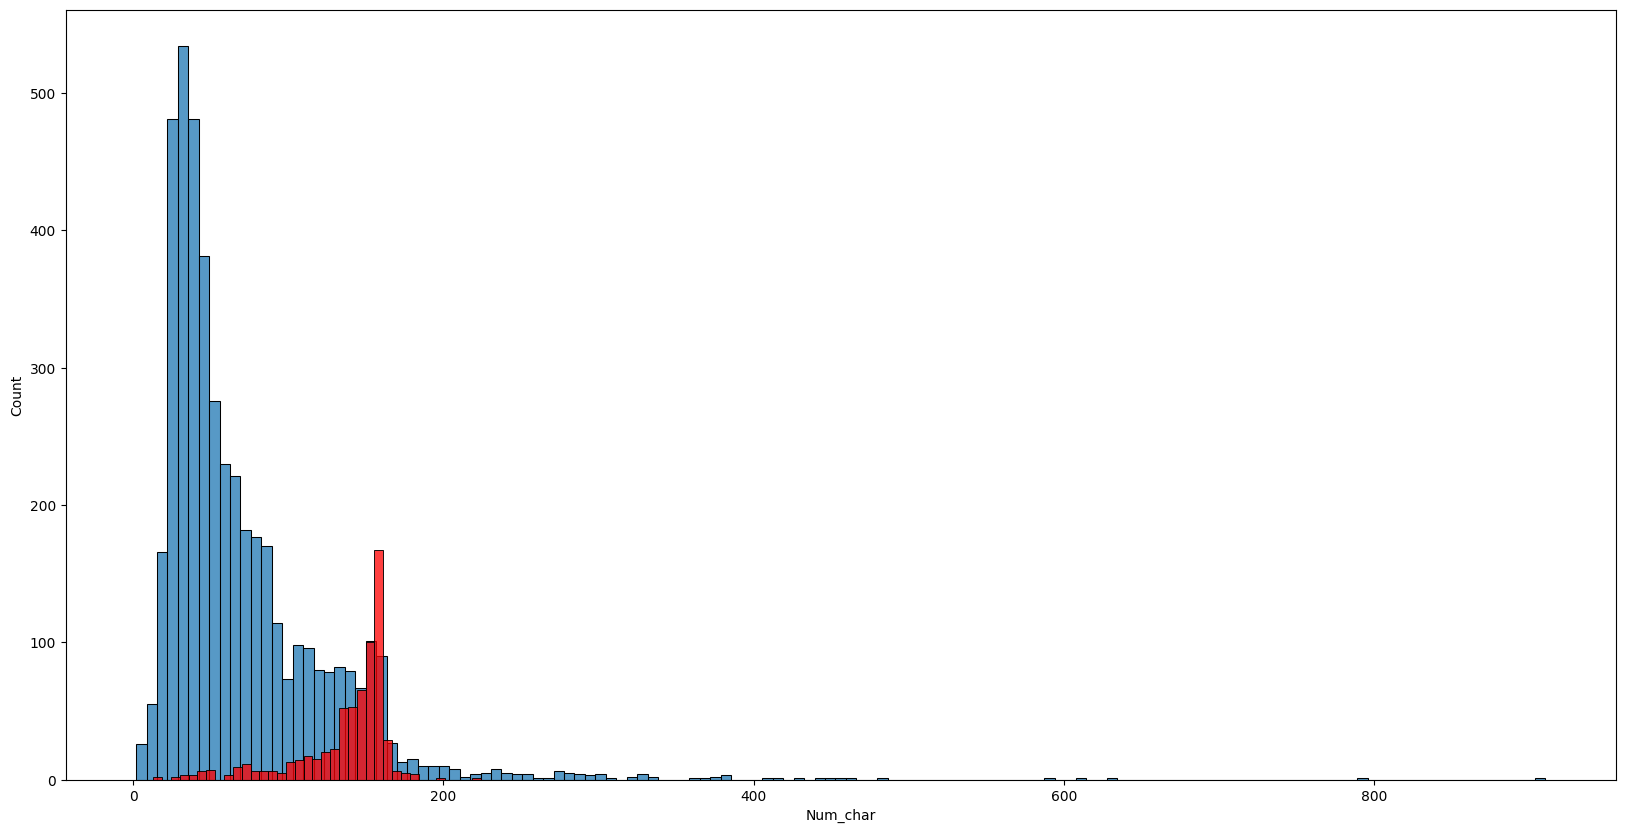

In [35]:
# Histogram

plt.figure(figsize=(20,10))
sns.histplot(df[df['Target'] == 0]['Num_char'])
sns.histplot(df[df['Target'] == 1] ['Num_char'], color= 'red')

<Figure size 1500x1500 with 0 Axes>

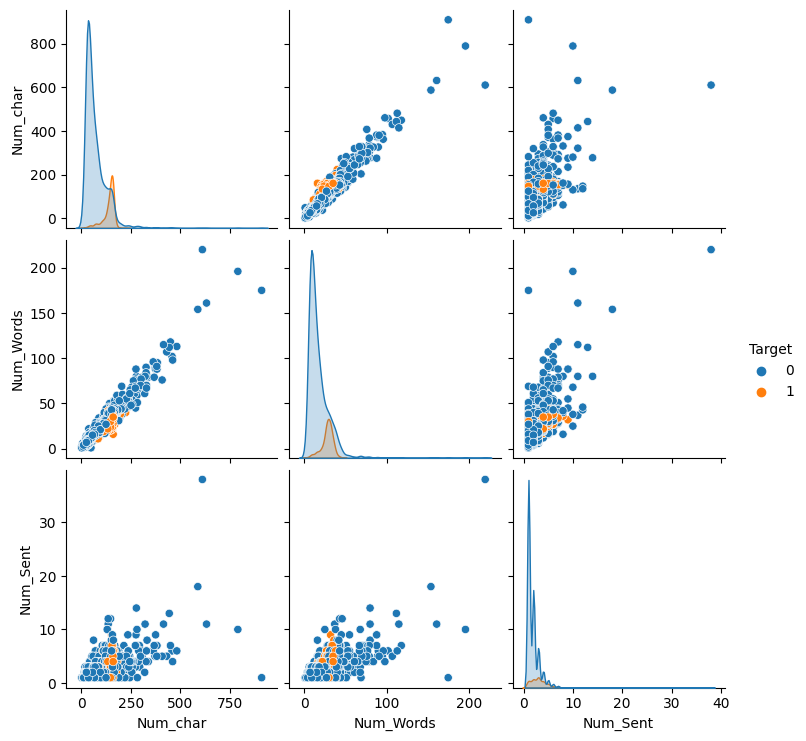

In [36]:
# Pair plot

plt.figure(figsize=(15,15))

sns.pairplot(df,hue='Target')

In [38]:
# correlation

# df.corr()

## 3. Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Charactors
4. Stemming 

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation  #list of punctions

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Beginning')
ps.stem('loving')

'love'

In [49]:
# Function to transformed the data

def Transform_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [50]:
# import nltk
w  = str(df['Text'][2594])
print(w)
print('\n after trasnformation \n' , Transform_Text(w))

That‰Û÷s the thing with apes, u can fight to the death to keep something, but the minute they have it when u let go, thats it!

 after trasnformation 
 thing ape u fight death keep someth minut u let go that


In [52]:
# apply on data

df['Transformed_Text'] = df['Text'].apply(Transform_Text)
df.sample(5)

,Target,Text,Num_char,Num_Words,Num_Sent,Transformed_Text
3597,0,"Aight, we'll head out in a few",30,9,1,aight head
1523,0,Yup ok thanx...,15,4,1,yup ok thanx
2837,0,Were trying to find a Chinese food place aroun...,52,10,1,tri find chines food place around
5027,0,Go chase after her and run her over while she'...,67,14,1,go chase run cross street
1835,0,* Will be september by then!,28,7,1,septemb


In [54]:
from wordcloud import WordCloud

wc = WordCloud( width = 800, height = 800, min_font_size = 10, background_color = 'White')

In [59]:
Spam_W_Count = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep =' '))

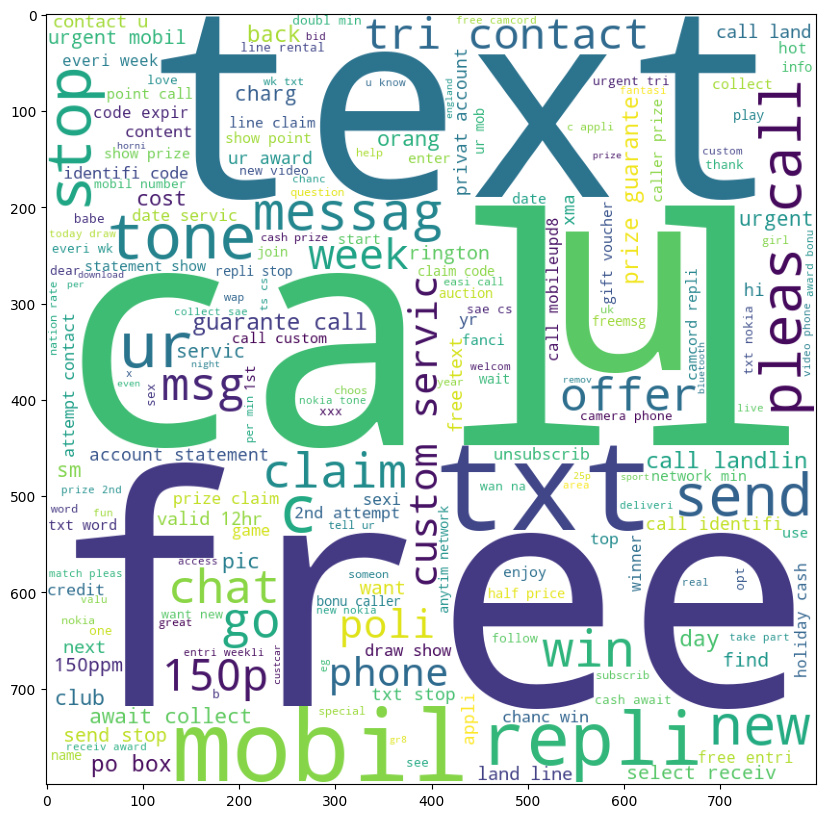

In [60]:
# collection of most common spam words

plt.figure(figsize=(15,10))
plt.imshow(Spam_W_Count)

In [61]:
df.sample(2)

,Target,Text,Num_char,Num_Words,Num_Sent,Transformed_Text
5209,0,"I know you are thinkin malaria. But relax, chi...",329,67,6,know thinkin malaria relax children cant handl...
4305,0,Awww dat is sweet! We can think of something t...,129,32,3,awww dat sweet think someth nice time tonight ...


In [64]:
Spam_corpus = []
for text in df[df['Target'] == 1]['Transformed_Text'].tolist():
    for i in text.split():
        Spam_corpus.append(i)

In [65]:
len(Spam_corpus)

9939

In [66]:
from collections import Counter
Counter(Spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [68]:
# list of most common spam word

Common = pd.DataFrame(Counter(Spam_corpus).most_common(30))
Common

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


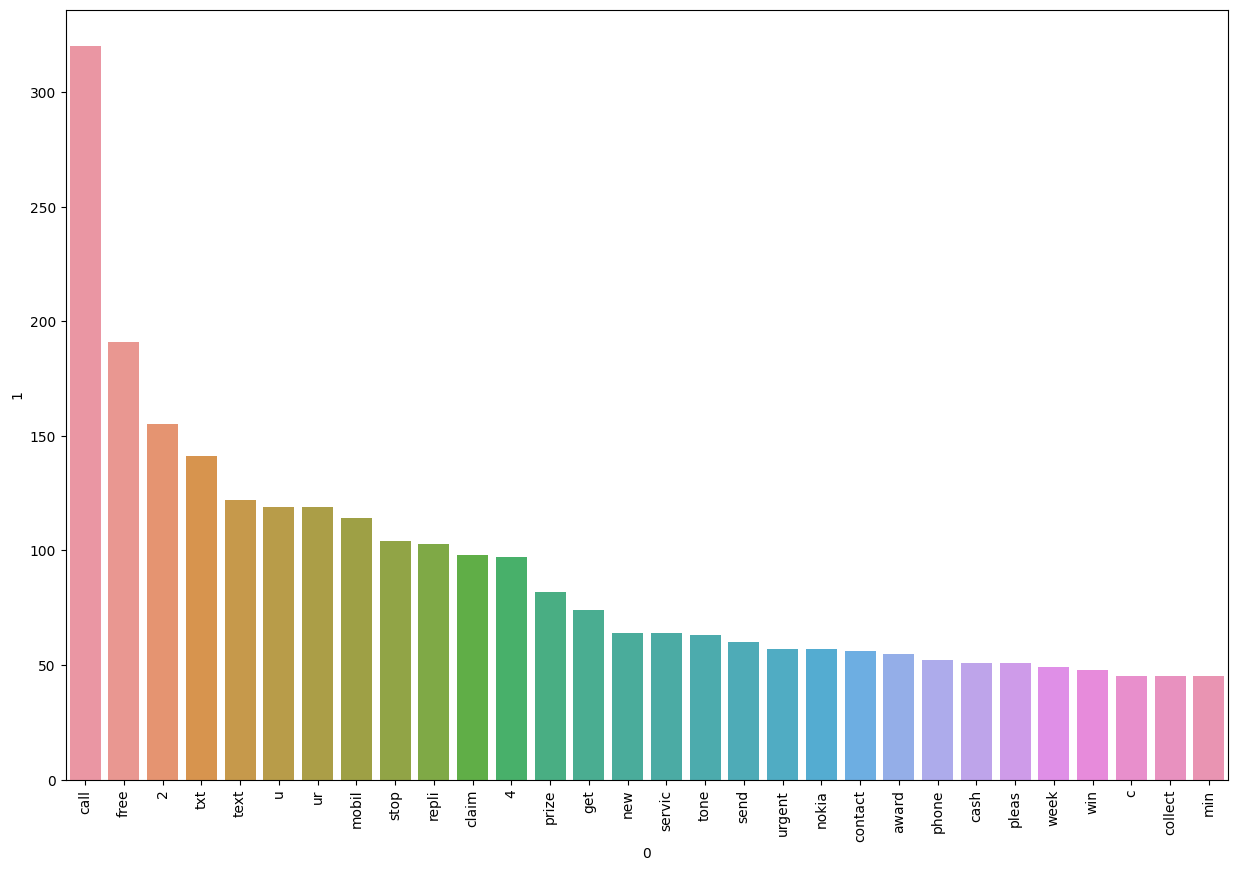

In [72]:
# Bar plot of spam words

plt.figure(figsize=(15,10))
sns.barplot(x = Common[0],y = Common[1])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
wc=WordCloud(width =800,height=800,min_font_size=10,background_color="white")


In [75]:
ham_W_Count=wc.generate(df[df["Target"]==0]["Transformed_Text"].str.cat(sep=" "))


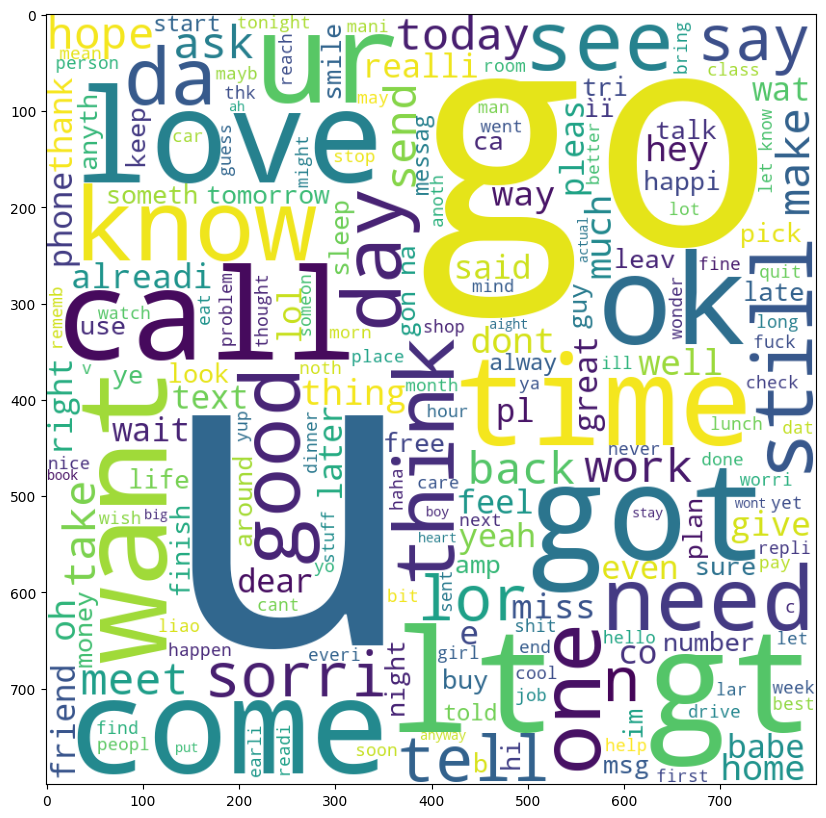

In [79]:
# collection of most common spam words

plt.figure(figsize=(20,10))
plt.imshow(ham_W_Count)

In [81]:
Ham_corpus = []
for text in df[df['Target'] == 0]['Transformed_Text'].tolist():
    for i in text.split():
        Ham_corpus.append(i)

In [82]:
len(Ham_corpus)

35404

In [83]:
# list of most common spam word

Ham_common = pd.DataFrame(Counter(Ham_corpus).most_common(30))
Ham_common

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


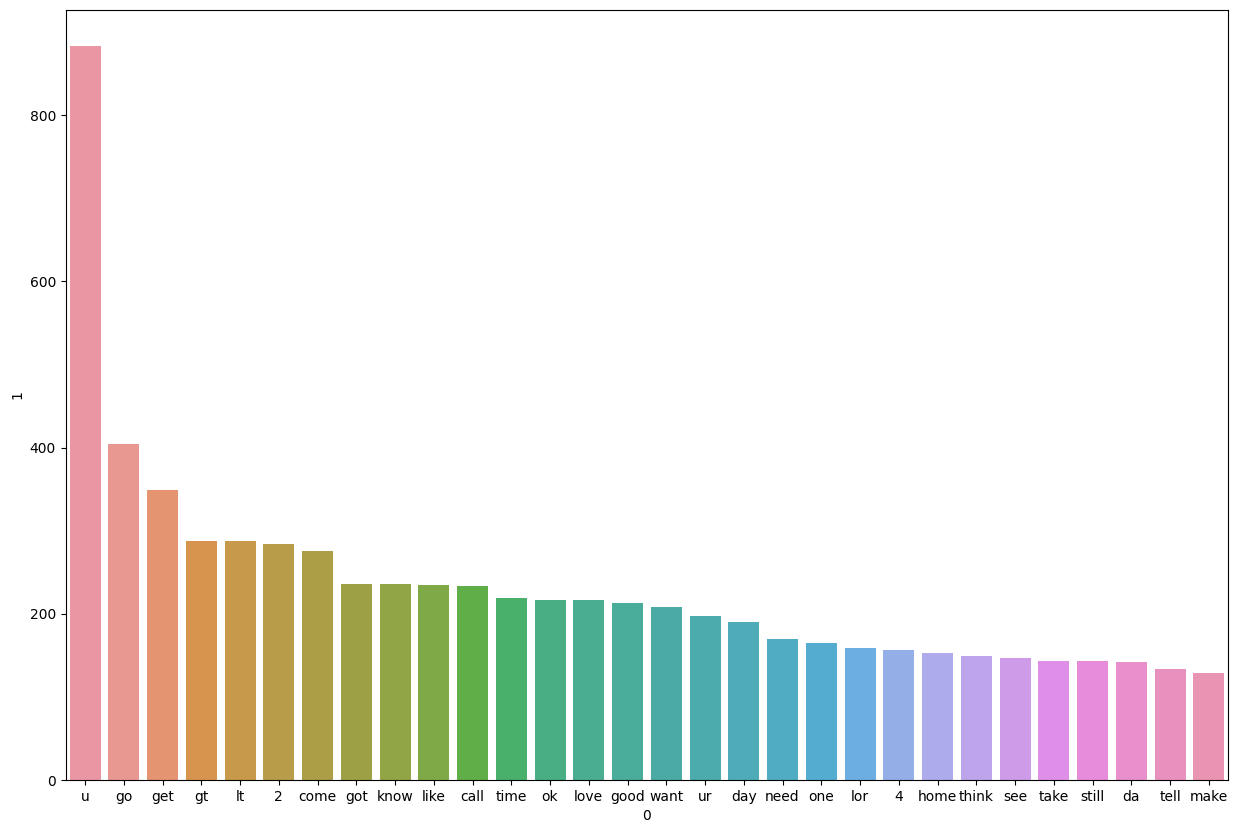

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x = Ham_common[0],y = Ham_common[1])
plt.show()

## 4. Model Building

In [104]:
# convert categorical data into vectorizer form

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [105]:
cv = CountVectorizer()
tv = TfidfVectorizer()

## 1st Method using CountVectorixer

In [89]:
x = cv.fit_transform(df['Transformed_Text']).toarray()
x.shape

(5169, 6708)

In [90]:
y = df['Target'].values
y.shape

(5169,)

## Split train and test datasets

We will split the loaded data into two separate datasets.

Train dataset: For training the text categorization model.

Test dataset: For validating the performence of the model.

In [92]:
from sklearn.model_selection import train_test_split as tts

In [93]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2, random_state=20)

In [94]:
#import Naive Bayes models

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [95]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [96]:
# Gaussian 
GNB.fit(x_train,y_train)
y_pred1=GNB.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[769 119]
 [ 18 128]]
0.5182186234817814


In [97]:
# MultinomialNB
MNB.fit(x_train,y_train)
y_pred2=(MNB.predict(x_test))

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[875  13]
 [ 12 134]]
0.9115646258503401


In [98]:
# BernoulliNB
BNB.fit(x_train,y_train)
y_pred3=BNB.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9671179883945842
[[886   2]
 [ 32 114]]
0.9827586206896551


## 2nd Method using TfidfVectorizer

In [106]:
x = tv.fit_transform(df["Transformed_Text"]).toarray()
x.shape

(5169, 6708)

In [107]:
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.2, random_state=200)
print(X_train)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 0 0 0]


In [108]:
# Gaussian
GNB.fit(X_train,Y_train)
Y_pred1=GNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8578336557059961
[[791 127]
 [ 20  96]]
0.4304932735426009


In [109]:
MNB.fit(X_train,Y_train)
Y_pred2=MNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[918   0]
 [ 30  86]]
1.0


In [110]:
MNB.fit(X_train,Y_train)
Y_pred2=MNB.predict(X_test)

print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[918   0]
 [ 30  86]]
1.0


In [111]:
# We use tfidf MNB high precision 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
LR= LogisticRegression() 
SVC=SVC(kernel='sigmoid',gamma=1.0)
DS=DecisionTreeClassifier(max_depth=5)
KNC=KNeighborsClassifier()
RF=RandomForestClassifier(n_estimators=50,random_state=2)
AB=AdaBoostClassifier(n_estimators=50,random_state=2)
BEG=BaggingClassifier(n_estimators=50,random_state=2)
ET=ExtraTreesClassifier(n_estimators=50,random_state=2)
XGB= XGBClassifier(n_estimators=50,random_state=2)

In [113]:
# LogisticRegression
LR.fit(x_train,y_train)
y_pred3=LR.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[886   2]
 [ 28 118]]
0.9833333333333333


In [114]:
# Support Vactor Machine
SVC.fit(x_train,y_train)
y_pred4=SVC.predict(x_test)

print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred3))

0.9342359767891683
[[858  30]
 [ 38 108]]
0.9833333333333333


In [115]:
# DecisionTreeClassifier
DS.fit(x_train,y_train)
y_pred5=DS.predict(x_test)

print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9245647969052224
[[883   5]
 [ 73  73]]
0.9358974358974359


In [116]:
# KNeighborsClassifier
KNC.fit(x_train,y_train)
y_pred6=KNC.predict(x_test)

print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.8868471953578336
[[888   0]
 [117  29]]
1.0


In [117]:
# RandomForestClassifier
RF.fit(x_train,y_train)
y_pred7=RF.predict(x_test)

print(accuracy_score(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
print(precision_score(y_test,y_pred7))

0.9680851063829787
[[888   0]
 [ 33 113]]
1.0


In [118]:
# AdaBoostClassifier
AB.fit(x_train,y_train)
y_pred8=AB.predict(x_test)

print(accuracy_score(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

0.9632495164410058
[[883   5]
 [ 33 113]]
0.9576271186440678


In [120]:
# BaggingClassifier
BEG.fit(x_train,y_train)
y_pred9=BEG.predict(x_test)

print(accuracy_score(y_test,y_pred9))
print(confusion_matrix(y_test,y_pred9))
print(precision_score(y_test,y_pred9))

0.9632495164410058
[[881   7]
 [ 31 115]]
0.9426229508196722


In [121]:
# ExtraTreesClassifier
ET.fit(x_train,y_train)
y_pred10=ET.predict(x_test)

print(accuracy_score(y_test,y_pred10))
print(confusion_matrix(y_test,y_pred10))
print(precision_score(y_test,y_pred10))

0.971953578336557
[[887   1]
 [ 28 118]]
0.9915966386554622


In [122]:
# XGBClassifier
XGB.fit(x_train,y_train)
y_pred12=XGB.predict(x_test)

print(accuracy_score(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))
print(precision_score(y_test,y_pred12))

0.9671179883945842
[[883   5]
 [ 29 117]]
0.9590163934426229


WE TAKE MultinomialNB WHICH HAS HEIGHEST PRECISION AND ACCURACY SCORE

In [123]:
# Make a pickle file

import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))


Sample Spam Mail

In [125]:
print(df["Text"][5567],"\n")
print(df["Text"][2],"\n")
print(df["Text"][5],"\n")
print(df["Text"][12],"\n")
print(df["Text"][34],"\n")

This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate. 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv 

URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged 



Samle Ham Mail

In [126]:
print(df["Text"][5],"\n")
print(df["Text"][7],"\n")
print(df["Text"][19],"\n")
print(df["Text"][13],"\n")
print(df["Text"][31],"\n")

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv 

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+ 

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. 

Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You?  



### ML Model AWS Deployment

##### Build the model

Export the model using Pickle/Joblib

• Build a streamlit website to serve the model

Deploy the website on AWS EC2
Create an AWS account

Create an EC2 instance

Edit security group

Downlood keygen(pem file)

Download and install Putty and WinSCP

Upload streamlit website to EC2 using WinSCP

Install the libraries by connecting through putty

streamlit run main.py